<a href="https://colab.research.google.com/github/sovunia-hub/deep-learning/blob/main/CIFAR10%20with%20LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

# Загрузка данных

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
from torchvision.datasets import CIFAR10

data_train = CIFAR10('./', download = True, train = True, transform=transform)
data_test = CIFAR10('./', download = True, train = False, transform=transform)

100%|██████████| 170498071/170498071 [00:01<00:00, 86537471.44it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader = DataLoader(data_train, batch_size=10, shuffle=True)
test_loader = DataLoader(data_test, batch_size=10, shuffle=False)
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

In [ ]:
train_images.shape

torch.Size([10, 3, 32, 32])

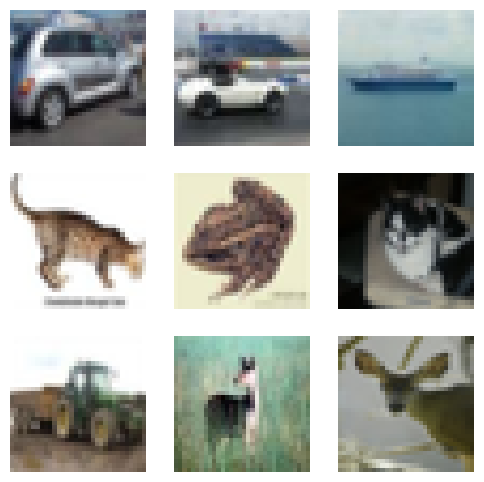

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
axs = axs.flatten()
for i, ax in enumerate(axs):
  ax.axis('off')
  train_image_np = train_images[i].numpy()
  train_image_np = np.transpose(train_image_np, (1, 2, 0))
  ax.imshow(train_image_np)
plt.show()

# Создание сети LeNet со старой архитектурой

In [ ]:
from torch import optim

lenet_old = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.Tanh(),
    nn.Linear(in_features=84, out_features=10)
)

In [ ]:
loss_vals = {}

In [ ]:
def train_model(model, train_loader, test_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    test_losses = []
    for epoch in range(num_epochs):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        model.eval()
        total_loss = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                total_loss += criterion(output, target).item()
        total_loss /= len(test_loader.dataset)
        print(f'Эпоха {epoch+1}, Ошибка на тестовом наборе: {total_loss}')
        test_losses.append(total_loss)
    return test_losses

In [ ]:
loss_vals['Old'] =  train_model(lenet_old, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.1523511161804199
Эпоха 2, Ошибка на тестовом наборе: 0.14201311172246933
Эпоха 3, Ошибка на тестовом наборе: 0.13673266005516052
Эпоха 4, Ошибка на тестовом наборе: 0.1342445732176304
Эпоха 5, Ошибка на тестовом наборе: 0.1334371226131916
Эпоха 6, Ошибка на тестовом наборе: 0.1318041934043169
Эпоха 7, Ошибка на тестовом наборе: 0.13039069711267948
Эпоха 8, Ошибка на тестовом наборе: 0.1301319986641407
Эпоха 9, Ошибка на тестовом наборе: 0.13082518004477023
Эпоха 10, Ошибка на тестовом наборе: 0.1343022802323103


In [ ]:
lenet_relu = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10)
)

In [ ]:
loss_vals['ReLU'] =  train_model(lenet_relu, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.1495880195736885
Эпоха 2, Ошибка на тестовом наборе: 0.13217287974655628
Эпоха 3, Ошибка на тестовом наборе: 0.12470141160786152
Эпоха 4, Ошибка на тестовом наборе: 0.1282911298006773
Эпоха 5, Ошибка на тестовом наборе: 0.11554722903072834
Эпоха 6, Ошибка на тестовом наборе: 0.11671037242412567
Эпоха 7, Ошибка на тестовом наборе: 0.1133217929109931
Эпоха 8, Ошибка на тестовом наборе: 0.11850838590562343
Эпоха 9, Ошибка на тестовом наборе: 0.11391158782094717
Эпоха 10, Ошибка на тестовом наборе: 0.11199517574310303


In [ ]:
lenet_maxpool = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10)
)

In [ ]:
loss_vals['MaxPool'] = train_model(lenet_maxpool, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.14363539513349532
Эпоха 2, Ошибка на тестовом наборе: 0.13783633747696877
Эпоха 3, Ошибка на тестовом наборе: 0.1282428742557764
Эпоха 4, Ошибка на тестовом наборе: 0.1243581786453724
Эпоха 5, Ошибка на тестовом наборе: 0.12517705659866332
Эпоха 6, Ошибка на тестовом наборе: 0.12282361207157373
Эпоха 7, Ошибка на тестовом наборе: 0.120509018227458
Эпоха 8, Ошибка на тестовом наборе: 0.12095644080936908
Эпоха 9, Ошибка на тестовом наборе: 0.11991396657824516
Эпоха 10, Ошибка на тестовом наборе: 0.11934981727302074


# Создание сети LeNet с новой архитекурой

In [ ]:
lenet_new = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0),
    nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0),
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10)
)

In [ ]:
loss_vals['New'] = train_model(lenet_new, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.1400865121603012
Эпоха 2, Ошибка на тестовом наборе: 0.11875787038803101
Эпоха 3, Ошибка на тестовом наборе: 0.11498548647016286
Эпоха 4, Ошибка на тестовом наборе: 0.10978165695369244
Эпоха 5, Ошибка на тестовом наборе: 0.11133284630477429
Эпоха 6, Ошибка на тестовом наборе: 0.10717474343180657
Эпоха 7, Ошибка на тестовом наборе: 0.10546839598417282
Эпоха 8, Ошибка на тестовом наборе: 0.10986786959171295
Эпоха 9, Ошибка на тестовом наборе: 0.10729794613867998
Эпоха 10, Ошибка на тестовом наборе: 0.10710864383429289


# Создание сети LeNet c нормализацией

In [ ]:
lenet_with_normalization = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(6),
    nn.ReLU(),
    nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(6),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=0),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
    nn.BatchNorm2d(120),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features=120, out_features=84),
    nn.BatchNorm1d(84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10)
)

In [ ]:
loss_vals['With normalization'] = train_model(lenet_with_normalization, train_loader, test_loader)

Эпоха 1, Ошибка на тестовом наборе: 0.12020642839372159
Эпоха 2, Ошибка на тестовом наборе: 0.10894601800441742
Эпоха 3, Ошибка на тестовом наборе: 0.09893521280735731
Эпоха 4, Ошибка на тестовом наборе: 0.09324104562997818
Эпоха 5, Ошибка на тестовом наборе: 0.09072459194660187
Эпоха 6, Ошибка на тестовом наборе: 0.0885312787398696
Эпоха 7, Ошибка на тестовом наборе: 0.084812817530334
Эпоха 8, Ошибка на тестовом наборе: 0.08332042091786862
Эпоха 9, Ошибка на тестовом наборе: 0.08363142489492893
Эпоха 10, Ошибка на тестовом наборе: 0.0861532224625349


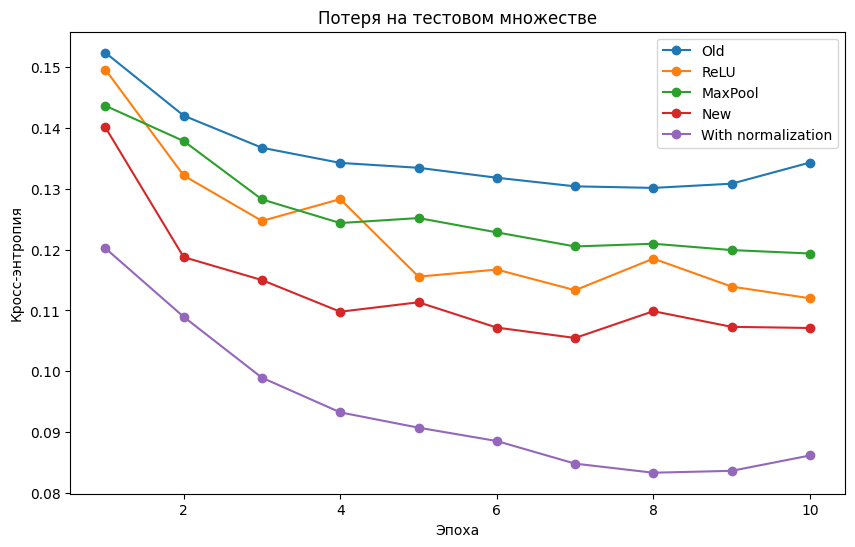

In [ ]:
plt.figure(figsize=(10, 6))
for lenet in loss_vals.keys():
  plt.plot(np.arange(1, 11), loss_vals[lenet], label=lenet, marker='o')
plt.xlabel("Эпоха")
plt.ylabel("Кросс-энтропия")
plt.title("Потеря на тестовом множестве")
plt.legend()
plt.show()